# **پیش گزارش**

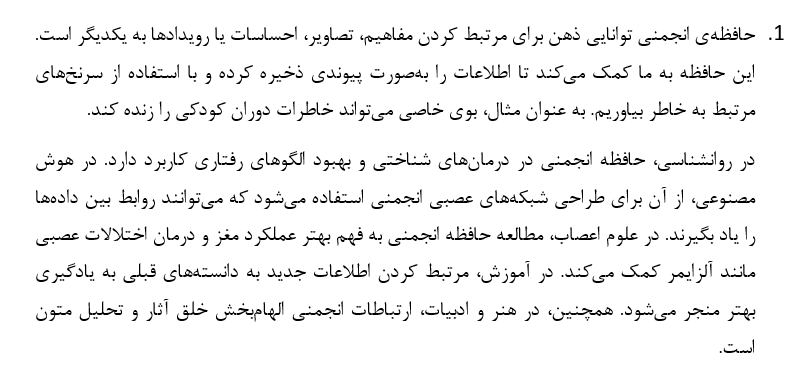

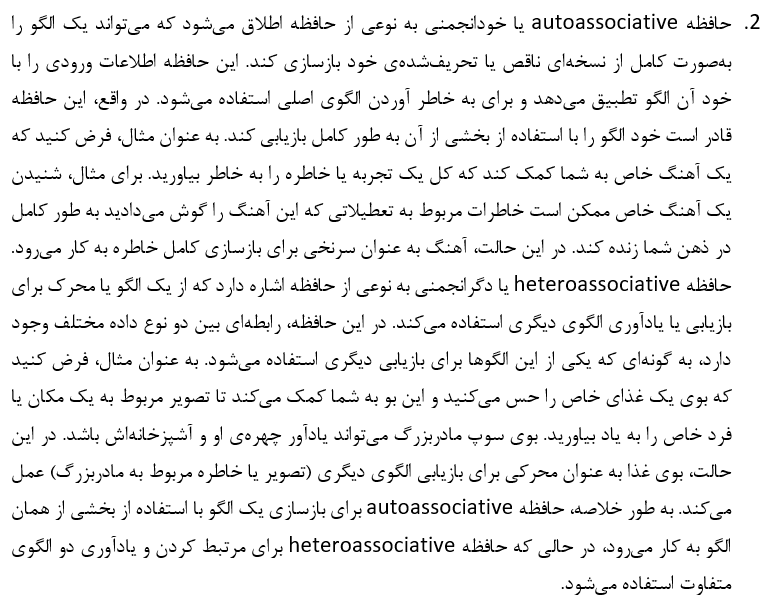

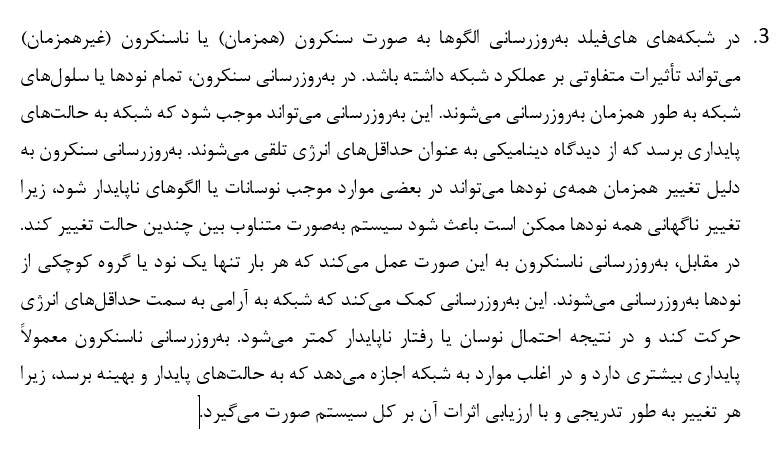

# **آزمایش**

In [9]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [10]:
class Hopfild:
    def __init__(self, input_size=32, number_of_classes=10):
        self.p = number_of_classes
        self.n = input_size
        self.sqrt_n = int(np.sqrt(input_size))

    def train(self, x):
        self.weight = np.mean(np.expand_dims(x, -1) * np.expand_dims(x, 1))

        self.weight = self.weight * (np.ones(self.weight.shape) - np.eye(self.n))


    def forward(self, x):
        y = self.weight @ np.expand_dims(x, -1)

        return np.where(y.reshape(self.sqrt_n, self.sqrt_n) <1, 0, 1)
p = 10

x = []

for i in range(p):

    img = cv2.imread('/content/' + str(i) + '.jpg' )
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    binary_image = np.where(img_gray < 128, -1, 1)
    x.append(binary_image)

x = np.asanyarray(x).reshape([p, -1])

n = x.shape[-1]

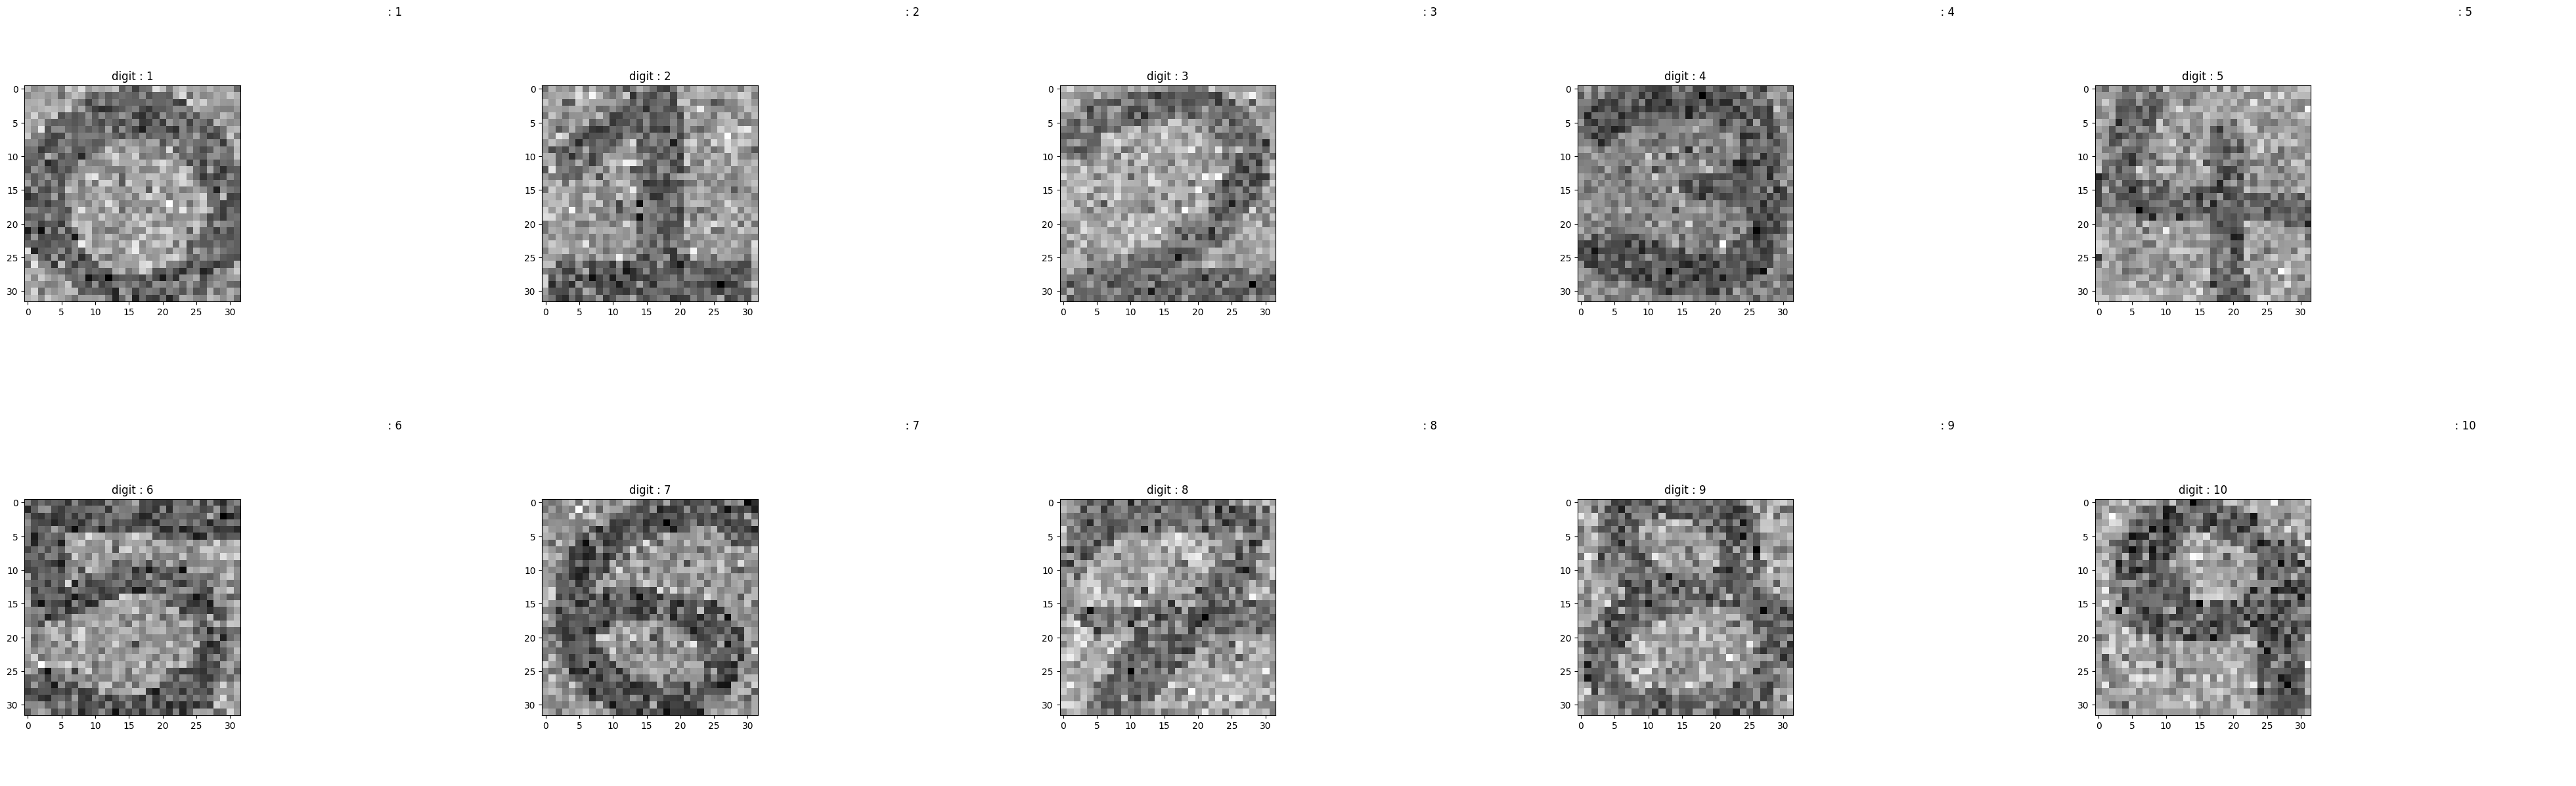

In [13]:
model_hopp = Hopfild(n, p)
model_hopp.train(x)
plt.figure(figsize=(p*5, 15))

for i in range(p):

    noise = np.random.normal(0, 1, x.shape[1])
    y = x[i] + noise

    plt.subplot(2, p, i*2 + 1)
    plt.imshow(y.reshape([32, 32]), cmap = 'gray')
    plt.title(f"digit : {i+1}")
    y_hat = model_hopp.forward(y)
    plt.subplot(2, p, i*2 + 2)
    plt.title(f"  : {i+1}")
    plt.axis("off")


# **تمرین**

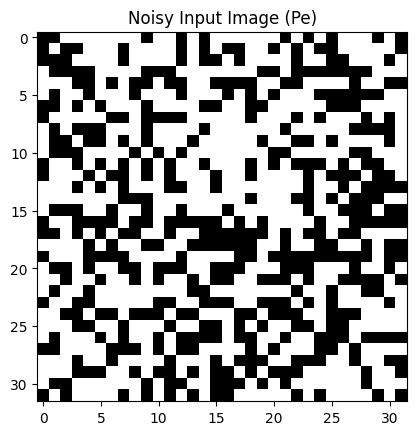

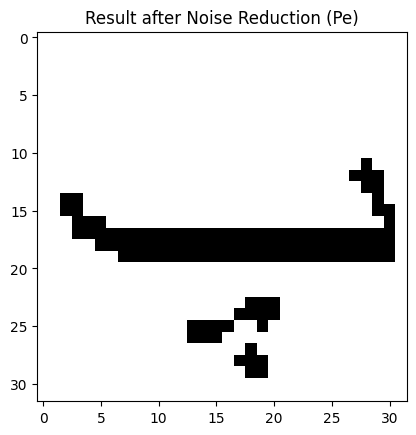

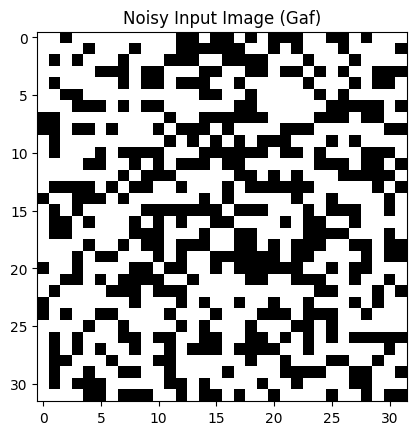

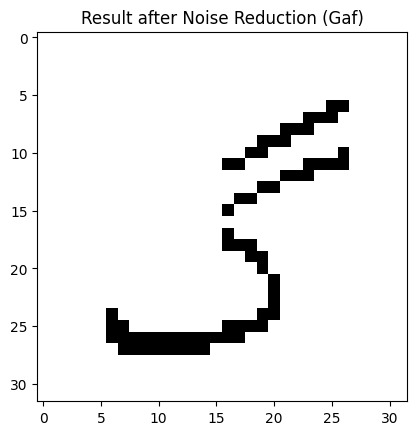

In [18]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

class HopfieldNetwork:
    def __init__(self, input_size):
        self.input_size = input_size
        self.weight = np.zeros((input_size, input_size))

    def train(self, patterns):
        for p in patterns:
            self.weight += np.outer(p, p)
        np.fill_diagonal(self.weight, 0)

    def predict(self, input_pattern, iterations=10):
        output = input_pattern.copy()
        for _ in range(iterations):
            for i in range(self.input_size):
                output[i] = 1 if np.dot(self.weight[i], output) >= 0 else -1
        return output
characters = ['pe', 'gaf']
patterns = []

for char in characters:
    img = cv2.imread(f'/content/{char}.png', cv2.IMREAD_GRAYSCALE)
    if img is None:
        raise FileNotFoundError(f"Image '/content/{char}.png' not found.")
    img = cv2.resize(img, (32, 32))  # تغییر اندازه به 32x32
    binary_image = np.where(img < 128, -1, 1)
    patterns.append(binary_image.flatten())

patterns = np.array(patterns)
hopfield_net = HopfieldNetwork(input_size=patterns.shape[1])
hopfield_net.train(patterns)

noisy_input_pe = patterns[0].copy()
noise_indices_pe = np.random.choice(len(noisy_input_pe), size=int(0.4 * len(noisy_input_pe)), replace=False)
noisy_input_pe[noise_indices_pe] *= -1

noisy_image_pe = noisy_input_pe.reshape(32, 32)
plt.imshow(noisy_image_pe, cmap='gray')
plt.title("Noisy Input Image (Pe)")
plt.show()

output_pattern_pe = hopfield_net.predict(noisy_input_pe)

output_image_pe = output_pattern_pe.reshape(32, 32)
plt.imshow(output_image_pe, cmap='gray')
plt.title("Result after Noise Reduction (Pe)")
plt.show()
##############
# گ
noisy_input_gaf = patterns[1].copy()
noise_indices_gaf = np.random.choice(len(noisy_input_gaf), size=int(0.4 * len(noisy_input_gaf)), replace=False)
noisy_input_gaf[noise_indices_gaf] *= -1

noisy_image_gaf = noisy_input_gaf.reshape(32, 32)
plt.imshow(noisy_image_gaf, cmap='gray')
plt.title("Noisy Input Image (Gaf)")
plt.show()

output_pattern_gaf = hopfield_net.predict(noisy_input_gaf)

output_image_gaf = output_pattern_gaf.reshape(32, 32)
plt.imshow(output_image_gaf, cmap='gray')
plt.title("Result after Noise Reduction (Gaf)")
plt.show()